In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

from Module.sam import sam_model_registry, SamPredictor
from Module.models.timm_image_encoder import TimmImageEncoder
from Module.sam.modeling.sam import Sam

C:\Users\danusys16\anaconda3\envs\yolov8\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
C:\Users\danusys16\anaconda3\envs\yolov8\lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
D:\015_segmentation\Custom_SAM\Module\sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with Module.sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
D:\015_segmentation\Custom_SAM\Module\sam\modeling\tiny_vit_sam.py:656: UserWarning: Over

## Model

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Decoder

In [11]:
model_type = 'vit_t'
checkpoint = '../Weights/mobile_sam.pt'

sam = sam_model_registry[model_type](checkpoint=checkpoint)
sam.to(device);

In [12]:
predictor = SamPredictor(sam)

## Image

(-0.5, 1242.5, 689.5, -0.5)

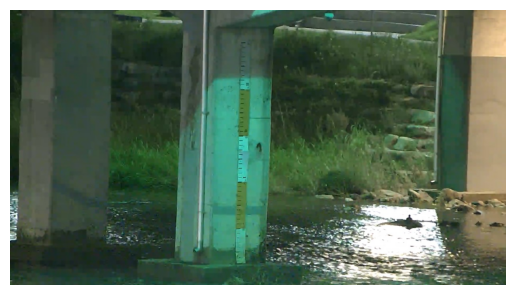

In [13]:
img_path = "../images/AY07.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

## Inference

In [14]:
predictor.set_image(img)

masks, _, _ = predictor.predict(
    point_coords=None,
    box=None,
    multimask_output=False)

binary_mask = (masks[0, :, :] > 0).astype(np.float32)

## Visualization

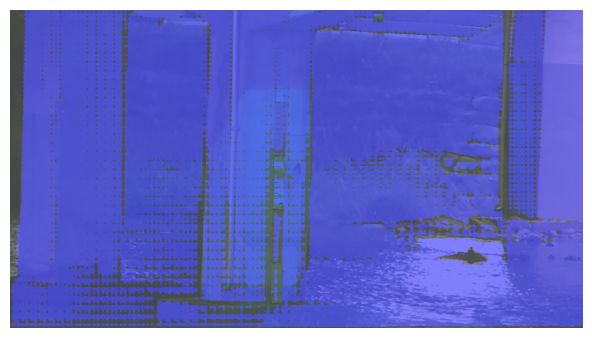

In [15]:
blue_mask = np.zeros_like(binary_mask)
blue_mask[binary_mask == 1] = 1
blue_mask_rgb = np.stack([np.zeros_like(blue_mask),
                          np.zeros_like(blue_mask), 
                          blue_mask], axis=-1)

plt.imshow(img, alpha=0.50)
plt.imshow(blue_mask_rgb, alpha=0.50)
plt.tight_layout()
plt.axis('off');

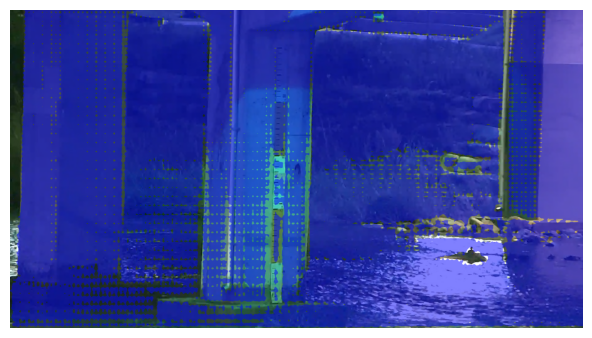

In [16]:
seg_img = img.copy()
seg_img[binary_mask==1] = (0,0,255)

transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)

plt.imshow(transparent_img)
plt.tight_layout()
plt.axis('off');